## Lectura Arkansas



Lectura de los archivos de reviews de Arkansas


In [1]:
import pandas as pd
import numpy as np
import missingno as msxo
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Lectura de archivos json de las reviews efectuadas en el estado de Arkansas. Voy a proceder a realizar la lectura y juntar dichos archivos, al tener todos la misma estructura es posible realizarlo mediante iteracion.

In [2]:
df_1 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Arkansas\1.json', lines= True)
df_2 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Arkansas\2.json', lines= True)
df_3 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Arkansas\3.json', lines= True)
df_4 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Arkansas\4.json', lines= True)
df_5 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Arkansas\5.json', lines= True)
df_6 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Arkansas\6.json', lines= True)
df_7 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Arkansas\7.json', lines= True)
df_8 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Arkansas\8.json', lines= True)
df_9 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Arkansas\9.json', lines= True)
df_10 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Arkansas\10.json', lines= True)
df_11 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Arkansas\11.json', lines= True)
df_12 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Arkansas\12.json', lines= True)
df_13 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Arkansas\13.json', lines= True)
df_14 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Arkansas\14.json', lines= True)
df_15 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Arkansas\15.json', lines= True)
df_16 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Arkansas\16.json', lines= True)





In [3]:
# Creo una lista para poder juntar todos los dataframes de los archivos en uno
dfs = []

# Itero entre cada uno de los dataframes para juntarlos en uno solo
for i in range(1, 17):
    
    df = globals()[f'df_{i}']
    dfs.append(df)


reviews_Arkansas = pd.concat(dfs, ignore_index=True)

In [4]:
# Vista primeros registros
reviews_Arkansas.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.083175e+20,cayla layman,1630760310327,5,Making West Memphis proud! Love this spot for ...,[{'url': ['https://lh5.googleusercontent.com/p...,"{'time': 1631039710340, 'text': 'Thank you ver...",0x87d57755954b200d:0x157d3f3bad3d37a4
1,1.021233e+20,thomas mcdaniel,1631038071292,1,Small burrito period high price. U dont get yo...,None,"{'time': 1631039604586, 'text': 'Sorry for you...",0x87d57755954b200d:0x157d3f3bad3d37a4
2,1.040671e+20,tony shelby,1627697592294,5,I love the food and the staff are very friendly,None,"{'time': 1627707384428, 'text': 'Thank you. Pl...",0x87d57755954b200d:0x157d3f3bad3d37a4


In [5]:
# Miro cuantos registros tenemos en el dataframe unido

reviews_Arkansas.shape

(2400000, 8)

In [6]:
# Miro el tipo de información

reviews_Arkansas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 146.5+ MB


In [7]:
# Checkeo de nulos y su porcentaje

nulls_FL = pd.DataFrame(reviews_Arkansas.isnull().sum().sort_values(ascending = False))
nulls_FL["Porcentaje de nulos"] = round(nulls_FL/reviews_Arkansas.shape[0]*100,2)
nulls_FL.rename(columns = {0:"Nro nulos"})

,Nro nulos,Porcentaje de nulos
pics,2351742,97.99
resp,2145217,89.38
text,1104248,46.01
user_id,0,0.00
name,0,0.00
time,0,0.00
rating,0,0.00
gmap_id,0,0.00


In [8]:
reviews_Arkansas.dropna(inplace=True)

In [9]:
reviews_Arkansas.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

In [10]:
reviews_Arkansas.user_id.nunique()

4521

In [11]:
reviews_Arkansas.text.nunique()

6305

En el estado de arkansas, tenemos 4521 usuarios que emitieron 6305 reseñas.

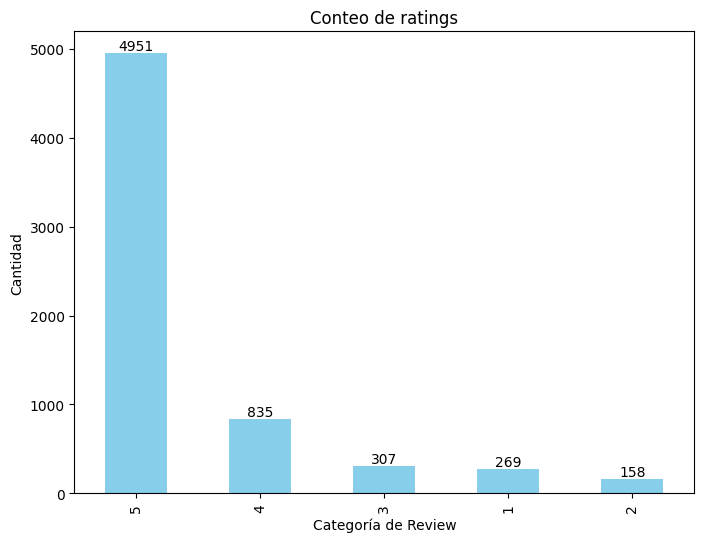

In [12]:
rating = reviews_Arkansas.rating.value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
rating.plot(kind='bar', color='skyblue')

# Agregar etiquetas a las barras
for i, count in enumerate(rating):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Configuración de etiquetas y título
plt.xlabel('Categoría de Review')
plt.ylabel('Cantidad')
plt.title('Conteo de ratings')

# Mostrar el gráfico
plt.show()


In [13]:
reviews_Arkansas['time'] = pd.to_datetime(reviews_Arkansas['time'], unit='ms').dt.strftime('%d/%m/%Y')

In [14]:
reviews_Arkansas['time'] = pd.to_datetime(reviews_Arkansas['time'], format='%d/%m/%Y')

reviews_Arkansas['year'] = reviews_Arkansas['time'].dt.year

In [15]:
min_date = reviews_Arkansas.time.min()
minimun_date = pd.to_datetime(min_date)
print(min_date)
print(minimun_date)

2016-07-10 00:00:00
2016-07-10 00:00:00


In [16]:
max_date = reviews_Arkansas.time.max()
maximun_date = pd.to_datetime(max_date)
print(max_date)
print(maximun_date)

2021-09-04 00:00:00
2021-09-04 00:00:00


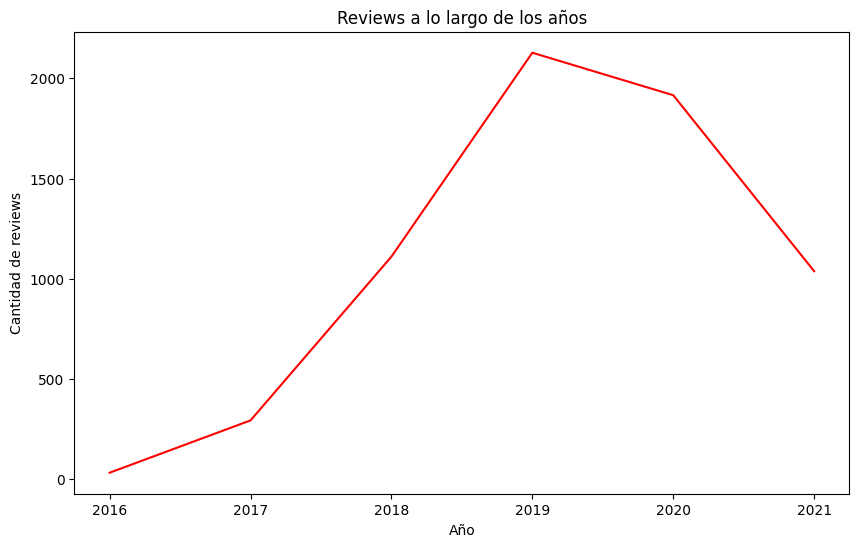

In [17]:
conteo_por_año= reviews_Arkansas[['year', 'text']].groupby('year').count().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=conteo_por_año, x='year', y= 'text', color='red')
plt.xlabel('Año')
plt.ylabel('Cantidad de reviews')
plt.title('Reviews a lo largo de los años')
plt.show()


In [18]:
reviews_Arkansas["text"] = reviews_Arkansas["text"].astype(str)

In [19]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


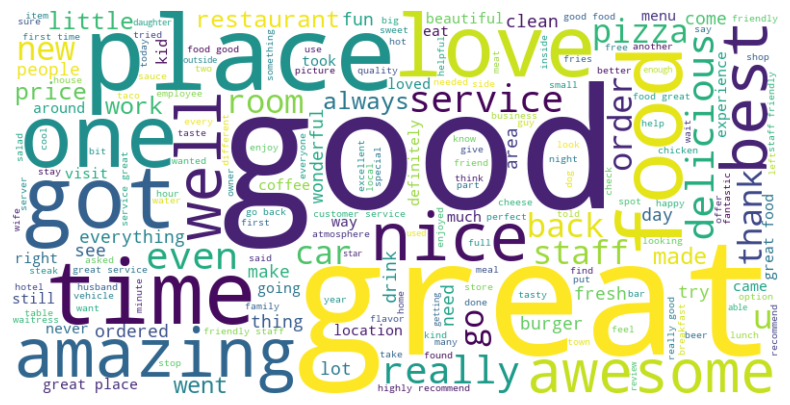

In [20]:
# Assuming you have a DataFrame named "reviews_XXXXXXXXXXXXXXXXXX" with a "text" column
texto = " ".join(reviews_Arkansas["text"])

# Download NLTK data for tokenization and stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization and removing stopwords
stop_words = set(stopwords.words("english"))
words = word_tokenize(texto)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Join the words into a text string
texto_procesado = " ".join(words)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_procesado)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
